# ETL (Extract, Transform, Load)

In [110]:
import os
import numpy as np
from PIL import Image, ImageEnhance
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import kagglehub

In [111]:
# pip install tensorflow

In [112]:
# pip install kagglehub

In [113]:
import kagglehub
# Tentukan path folder yang berisi dataset
path = kagglehub.dataset_download("aryashah2k/mango-leaf-disease-dataset")
dataset_folder = path
healthy_folder = os.path.join(dataset_folder, 'Healthy')
powdery_mildew_folder = os.path.join(dataset_folder, 'Powdery Mildew')
anthracnose_folder = os.path.join(dataset_folder, 'Anthracnose')
bacterial_canker_folder = os.path.join(dataset_folder, 'Bacterial Canker')

cutting_weevil_folder = os.path.join(dataset_folder, 'Cutting Weevil')
die_back_folder = os.path.join(dataset_folder, 'Die Back')
gall_midge_folder = os.path.join(dataset_folder, 'Gall Midge')
sooty_mould_folder = os.path.join(dataset_folder, 'Sooty Mould')

print("Path ke folder dataset:", dataset_folder)
print("Isi folder dataset:", os.listdir(dataset_folder))

Path ke folder dataset: C:\Users\User\.cache\kagglehub\datasets\aryashah2k\mango-leaf-disease-dataset\versions\1
Isi folder dataset: ['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [114]:
print("Memeriksa folder dataset...")
folders = [healthy_folder, powdery_mildew_folder, anthracnose_folder, bacterial_canker_folder,
           cutting_weevil_folder, die_back_folder, gall_midge_folder, sooty_mould_folder]
for folder in folders:
    print(f"Folder {folder}: {'Ada' if os.path.exists(folder) else 'Tidak ditemukan'}")

Memeriksa folder dataset...
Folder C:\Users\User\.cache\kagglehub\datasets\aryashah2k\mango-leaf-disease-dataset\versions\1\Healthy: Ada
Folder C:\Users\User\.cache\kagglehub\datasets\aryashah2k\mango-leaf-disease-dataset\versions\1\Powdery Mildew: Ada
Folder C:\Users\User\.cache\kagglehub\datasets\aryashah2k\mango-leaf-disease-dataset\versions\1\Anthracnose: Ada
Folder C:\Users\User\.cache\kagglehub\datasets\aryashah2k\mango-leaf-disease-dataset\versions\1\Bacterial Canker: Ada
Folder C:\Users\User\.cache\kagglehub\datasets\aryashah2k\mango-leaf-disease-dataset\versions\1\Cutting Weevil: Ada
Folder C:\Users\User\.cache\kagglehub\datasets\aryashah2k\mango-leaf-disease-dataset\versions\1\Die Back: Ada
Folder C:\Users\User\.cache\kagglehub\datasets\aryashah2k\mango-leaf-disease-dataset\versions\1\Gall Midge: Ada
Folder C:\Users\User\.cache\kagglehub\datasets\aryashah2k\mango-leaf-disease-dataset\versions\1\Sooty Mould: Ada


# EDA

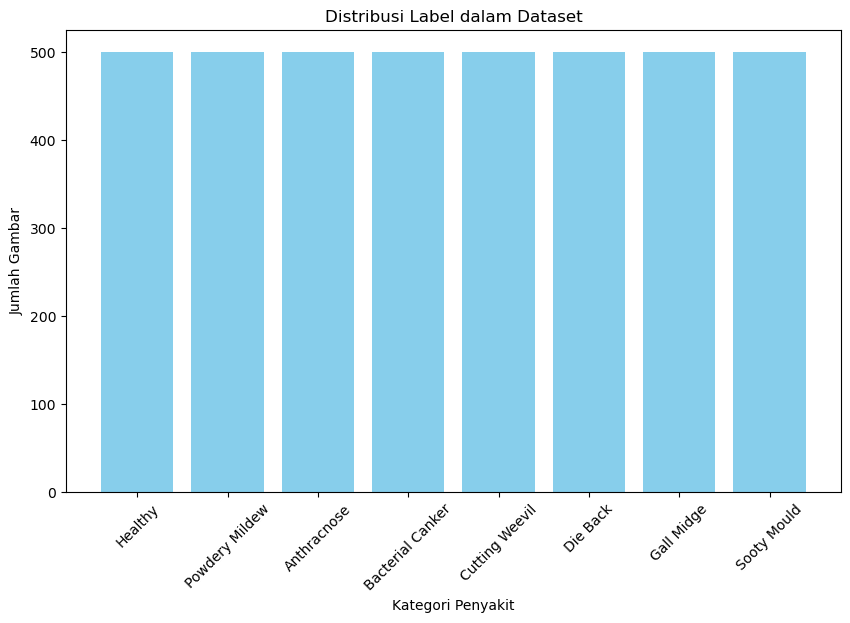

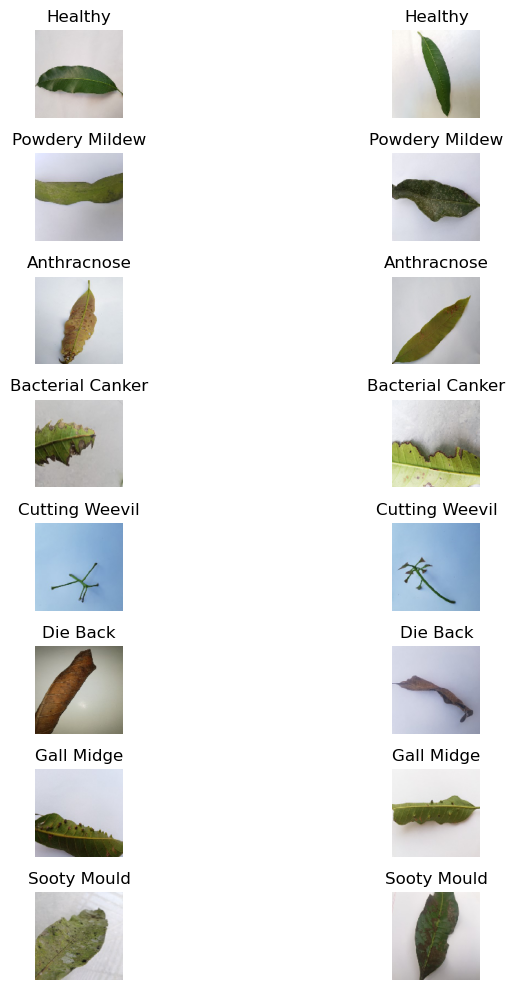

Rata-rata ukuran gambar: (128.00, 128.00)


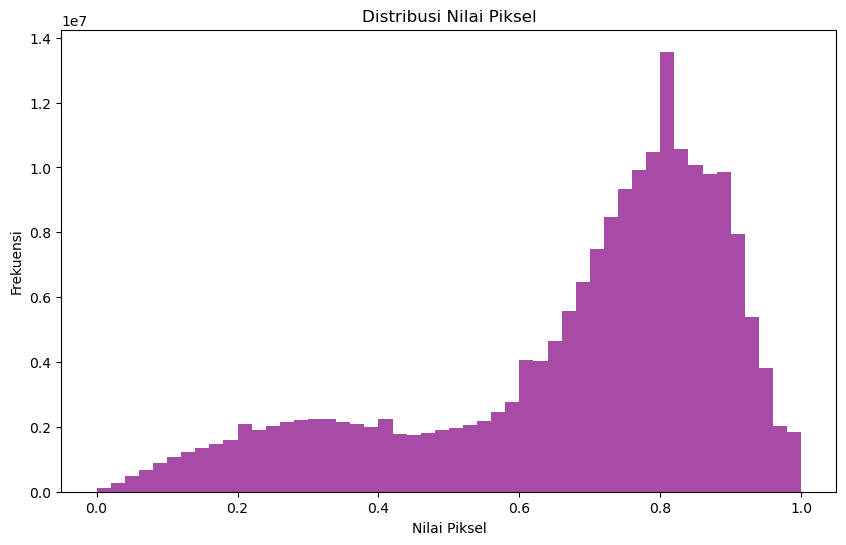

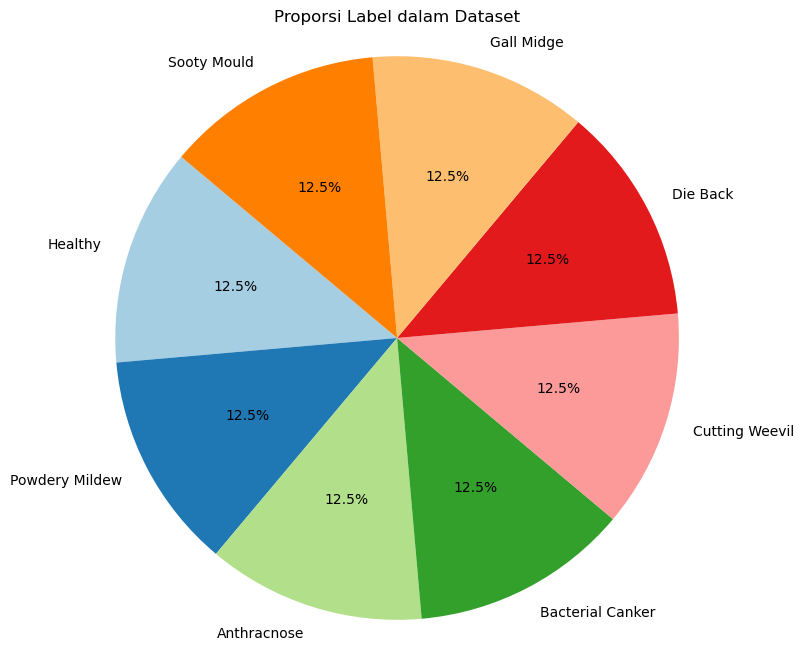

In [116]:
from collections import Counter
import matplotlib.pyplot as plt

# Menyiapkan folder untuk kategori label
folders = {
    "Healthy": healthy_folder,
    "Powdery Mildew": powdery_mildew_folder,
    "Anthracnose": anthracnose_folder,
    "Bacterial Canker": bacterial_canker_folder,
    "Cutting Weevil": cutting_weevil_folder,
    "Die Back": die_back_folder,
    "Gall Midge": gall_midge_folder,
    "Sooty Mould": sooty_mould_folder
}

# Menyiapkan data gambar dan label
X = []
y = []

# Memuat gambar dan label
for label, folder in folders.items():
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = load_img(img_path, target_size=(128, 128))  # Resize gambar sesuai kebutuhan
        img_array = img_to_array(img) / 255.0  # Normalisasi piksel
        X.append(img_array)
        y.append(label)

# Mengonversi X dan y menjadi array numpy
X = np.array(X)
y = np.array(y)

# Mengonversi label menjadi numerik (integer encoding)
label_folders = {i: folder for i, folder in enumerate(folders.keys())}
y_numeric = np.array([list(label_folders.keys())[list(label_folders.values()).index(label)] for label in y])

# Menampilkan distribusi label
def plot_label_distribution(y_numeric, label_folders):
    # Menghitung distribusi label
    label_counts = Counter(y_numeric)
    labels = [label_folders[label] for label in label_counts.keys()]
    counts = list(label_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color="skyblue")
    plt.title("Distribusi Label dalam Dataset")
    plt.xlabel("Kategori Penyakit")
    plt.ylabel("Jumlah Gambar")
    plt.xticks(rotation=45)
    plt.show()

# Menampilkan beberapa sampel gambar
def display_sample_images(X, y_numeric, label_folders, n_samples=2):
    # Ambil label unik
    unique_labels = np.unique(y_numeric)
    
    plt.figure(figsize=(10, 10))
    
    for label in unique_labels:
        # Ambil indeks gambar berdasarkan label
        label_indices = np.where(y_numeric == label)[0]
        
        # Pilih beberapa sampel secara acak
        sample_indices = np.random.choice(label_indices, n_samples, replace=False)
        
        for i, idx in enumerate(sample_indices):
            # Gunakan int() untuk memastikan subplot index adalah integer
            plt.subplot(len(unique_labels), n_samples, int(label * n_samples + i + 1))
            plt.imshow(X[idx])
            plt.axis("off")
            plt.title(label_folders[label])  # Menampilkan label folder sebagai judul
    
    plt.tight_layout()
    plt.show()

# Menampilkan ukuran gambar rata-rata
def calculate_average_image_size(X):
    total_width = 0
    total_height = 0
    for img_array in X:
        total_height += img_array.shape[0]
        total_width += img_array.shape[1]

    avg_height = total_height / len(X)
    avg_width = total_width / len(X)
    print(f"Rata-rata ukuran gambar: ({avg_width:.2f}, {avg_height:.2f})")

# Menampilkan histogram distribusi piksel
def plot_pixel_distribution(X):
    pixel_values = X.flatten()
    plt.figure(figsize=(10, 6))
    plt.hist(pixel_values, bins=50, color="purple", alpha=0.7)
    plt.title("Distribusi Nilai Piksel")
    plt.xlabel("Nilai Piksel")
    plt.ylabel("Frekuensi")
    plt.show()

# Menampilkan proporsi data tiap label
def plot_label_proportions(y_numeric, label_folders):
    label_counts = Counter(y_numeric)
    labels = [label_folders[label] for label in label_counts.keys()]
    counts = list(label_counts.values())

    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
    plt.title("Proporsi Label dalam Dataset")
    plt.axis("equal")
    plt.show()

# 1. Plot distribusi label
plot_label_distribution(y_numeric, label_folders)

# 2. Tampilkan beberapa sampel gambar
display_sample_images(X, y_numeric, label_folders, n_samples=2)

# 3. Hitung ukuran gambar rata-rata
calculate_average_image_size(X)

# 4. Plot distribusi nilai piksel
plot_pixel_distribution(X)

# 5. Plot proporsi label
plot_label_proportions(y_numeric, label_folders)

# Preprocessing

In [118]:
# Fungsi untuk memproses gambar
def preprocess_image(image_path, target_size=(256, 256)):
    img = load_img(image_path, target_size=target_size)  # Memuat gambar dan mengubah ukuran
    img_array = img_to_array(img)  # Mengonversi gambar menjadi array
    img_array = img_array / 255.0  # Normalisasi piksel gambar antara 0 dan 1
    return img_array

In [119]:
def load_and_preprocess_images(folder, label, target_size=(256, 256)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.lower().endswith(('png', 'jpg', 'jpeg')):
            img_array = preprocess_image(img_path, target_size)
            images.append(img_array)
            labels.append(label)
    return images, labels

# 6. Muat dan proses gambar dari setiap folder
print("Memuat gambar...")
healthy_images, healthy_labels = load_and_preprocess_images(healthy_folder, 0)
powdery_mildew_images, powdery_mildew_labels = load_and_preprocess_images(powdery_mildew_folder, 1)
anthracnose_images, anthracnose_labels = load_and_preprocess_images(anthracnose_folder, 2)
bacterial_canker_images, bacterial_canker_labels = load_and_preprocess_images(bacterial_canker_folder, 3)
cutting_weevil_images, cutting_weevil_labels = load_and_preprocess_images(cutting_weevil_folder, 4)
die_back_images, die_back_labels = load_and_preprocess_images(die_back_folder, 5)
gall_midge_images, gall_midge_labels = load_and_preprocess_images(gall_midge_folder, 6)
sooty_mould_images, sooty_mould_labels = load_and_preprocess_images(sooty_mould_folder, 7)

# 7. Gabungkan semua gambar dan label
X = np.array(
    healthy_images +
    powdery_mildew_images +
    anthracnose_images +
    bacterial_canker_images +
    cutting_weevil_images +
    die_back_images +
    gall_midge_images +
    sooty_mould_images
)
y = np.array(
    healthy_labels +
    powdery_mildew_labels +
    anthracnose_labels +
    bacterial_canker_labels +
    cutting_weevil_labels +
    die_back_labels +
    gall_midge_labels +
    sooty_mould_labels
)

y = to_categorical(y, num_classes=len(folders))  # 8 kelas

# 8. Tampilkan jumlah data
print(f"Total gambar X: {len(X)}")
print(f"Total label y: {len(y)}")

Memuat gambar...
Total gambar X: 4000
Total label y: 4000


In [120]:
# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 3200
Jumlah data testing: 800


In [121]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [122]:
# Menyimpan gambar berdasarkan labelnya
label_folders = {
    0: 'Healthy',
    1: 'Powdery_Mildew',
    2: 'Anthracnose',
    3: 'Bacterial_Canker',
    4: 'Cutting_Weevil',
    5: 'Die_Back',
    6: 'Gall_Midge',
    7: 'Sooty_Mould'
}

# Model

In [124]:
from tensorflow.keras import layers, models, callbacks

input_shape = (256, 256, 3)
num_classes = len(folders)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout untuk regularisasi
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping dan learning rate scheduler
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


# Informasi model
model.summary()

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,008 (56.61 MB)

 Trainable params: 14,840,008 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 376s 4s/step - accuracy: 0.1648 - loss: 2.3834 - val_accuracy: 0.5138 - val_loss: 1.4815 - learning_rate: 0.0010
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.4157 - loss: 1.4848 - val_accuracy: 0.7163 - val_loss: 0.8842 - learning_rate: 0.0010
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 415s 4s/step - accuracy: 0.6056 - loss: 1.0822 - val_accuracy: 0.7950 - val_loss: 0.6524 - learning_rate: 0.0010
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.6454 - loss: 0.9431 - val_accuracy: 0.8450 - val_loss: 0.4674 - learning_rate: 0.0010
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 384s 4s/step - accuracy: 0.7072 - loss: 0.7946 - val_accuracy: 0.8313 - val_loss: 0.5156 - learning_rate: 0.0010
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 401s 4s/step - accuracy: 0.7270 - loss: 0.7200 - val_accuracy: 0.8313 - val_loss: 0.4868 - learning_rate: 0.0010
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 364s 4s/step - accuracy: 0.7697 - loss: 0.

# Evaluasi

In [127]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Loss pada data uji: {test_loss}")
print(f"Akurasi pada data uji: {test_accuracy}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 795ms/step - accuracy: 0.9354 - loss: 0.2178
Loss pada data uji: 0.1844884157180786
Akurasi pada data uji: 0.949999988079071


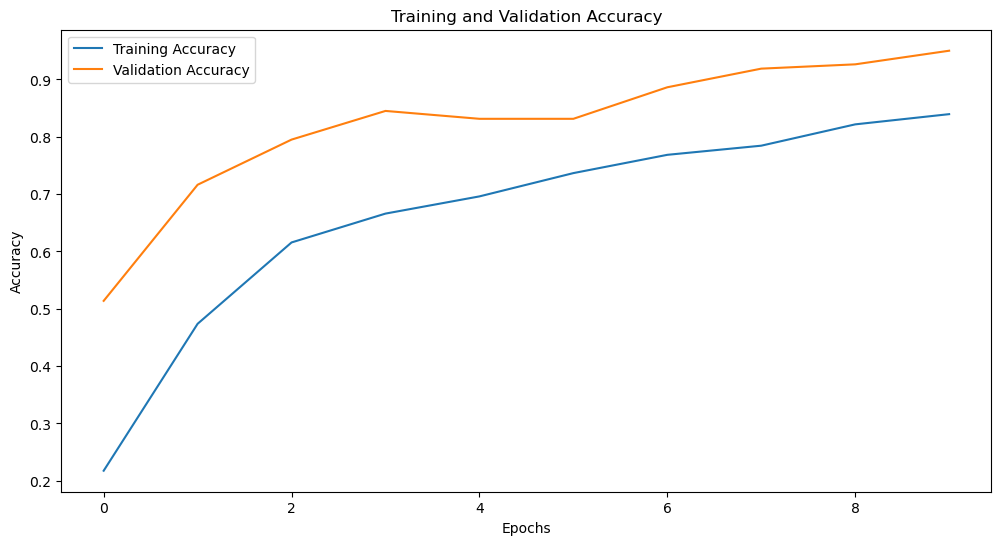

In [128]:
# Plot Akurasi
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

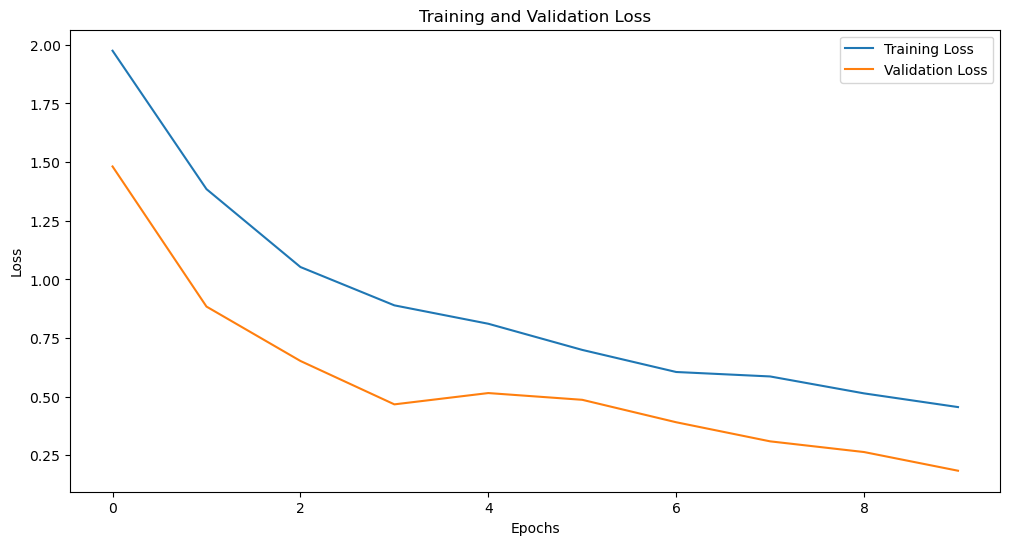

In [129]:
# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 761ms/step


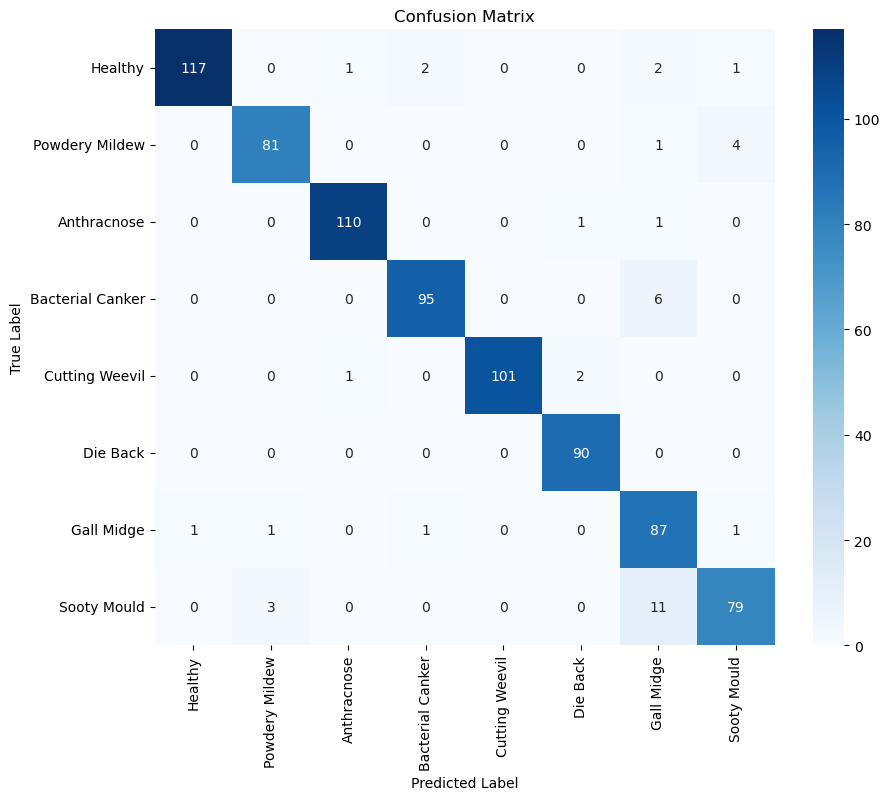

In [155]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Konversi y_test dari one-hot encoding menjadi label
y_test_labels = np.argmax(y_test, axis=-1)

# Prediksi data uji
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Matriks kebingungan
conf_matrix = confusion_matrix(y_test_labels, y_pred)

folders = ["Healthy", "Powdery Mildew", "Anthracnose", "Bacterial Canker", 
           "Cutting Weevil", "Die Back", "Gall Midge", "Sooty Mould"]

# Plot matriks kebingungan
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=folders, yticklabels=folders)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [131]:
from sklearn.metrics import classification_report

# Konversi y_test dari one-hot encoding ke label
y_test_labels = np.argmax(y_test, axis=1)

# Laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test_labels, y_pred, target_names=list(label_folders.values())))

Laporan Klasifikasi:
                  precision    recall  f1-score   support

         Healthy       0.99      0.95      0.97       123
  Powdery_Mildew       0.95      0.94      0.95        86
     Anthracnose       0.98      0.98      0.98       112
Bacterial_Canker       0.97      0.94      0.95       101
  Cutting_Weevil       1.00      0.97      0.99       104
        Die_Back       0.97      1.00      0.98        90
      Gall_Midge       0.81      0.96      0.87        91
     Sooty_Mould       0.93      0.85      0.89        93

        accuracy                           0.95       800
       macro avg       0.95      0.95      0.95       800
    weighted avg       0.95      0.95      0.95       800



In [132]:
# import matplotlib.pyplot as plt
# import numpy as np
# from keras.preprocessing.image import load_img, img_to_array
# import os

# # Fungsi untuk memproses gambar: resize dan normalisasi
# def preprocess_image(image_path, target_size=(256, 256)):
#     img = load_img(image_path, target_size=target_size)  # Resize gambar ke ukuran yang sesuai dengan model
#     img_array = img_to_array(img) / 255.0  # Normalisasi gambar ke rentang [0, 1]
#     return img, img_array

# # Fungsi untuk memprediksi gambar baru
# def predict_new_image(image_path):
#     img, img_array = preprocess_image(image_path, target_size=(256, 256))  # Proses gambar
#     img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
#     prediction = np.argmax(model.predict(img_array), axis=-1)  # Prediksi kelas
#     predicted_label = label_folders[prediction[0]]  # Pemetaan hasil prediksi ke label
#     return img, predicted_label

# # Upload gambar yang ingin diprediksi
# uploaded = files.upload()  # Menggunakan files.upload() jika di Google Colab

# for fn in uploaded.keys():
#     # Path gambar yang di-upload
#     image_path = fn
    
#     # Prediksi untuk gambar yang di-upload
#     img, predicted_label = predict_new_image(image_path)
    
#     # Menampilkan gambar dan label prediksi
#     plt.imshow(img)
#     plt.title(f"Predicted Label: {predicted_label}")
#     plt.axis('off')
#     plt.show()
    
#     # Menampilkan hasil prediksi di terminal
#     print(f"Predicted Label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


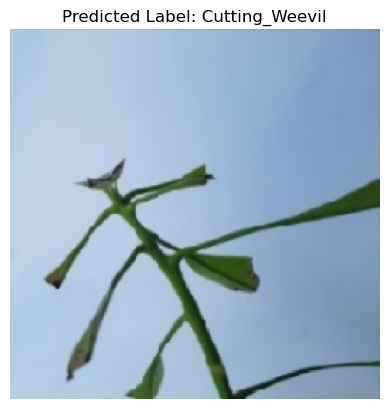

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import os

def preprocess_image(image_path, target_size=(256, 256)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalisasi ke skala [0, 1]
    return img, img_array

def predict_new_image(image_path):
    img, img_array = preprocess_image(image_path, target_size=(256, 256))  
    img_array = np.expand_dims(img_array, axis=0)  
    prediction = np.argmax(model.predict(img_array), axis=-1)
    predicted_label = label_folders[prediction[0]]
    return img, predicted_label

# Contoh pengujian
test_image_path = r"C:\Users\User\Downloads\Test\Cut.png"
img, predicted_label = predict_new_image(test_image_path)

# Visualisasi hasil
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()